In [1]:
import sys
if ".." not in sys.path:
    sys.path.append("..")
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from Regression.Linear import Linear, LinearCustom
from Regression.Logistic import Logistic, LogisticCustom
from Classification.bayes import NaiveBayes
from Knn.knn import knn
from Kmeans.Kmeans import KMeans

## Data loading 

In [2]:
with open("data/murders.txt") as f:
    raw_murders_data = pd.read_csv(f, sep=";", index_col=0)

raw_murders_data.head(3)

,Inhabitants,Percent with incomes below $5000,Percent unemployed,"Murders per annum per 1,000,000 inhabitants"
Index,,,,
1,587000,16.5,6.2,11.2
2,643000,20.5,6.4,13.4
3,635000,26.3,9.3,40.7


In [3]:
test_frac = 0.3
div_index = int(test_frac*raw_murders_data.shape[0])
random_order_data = raw_murders_data.values.copy()
np.random.shuffle(random_order_data)

test, train = np.split(random_order_data, [div_index])
x_train, y_train = train[:, :3], train[:, 3]
x_test, y_test = test[:, :3], test[:, 3]

## Linear regression

### Normalization

In [4]:
x0_std, x0_mean = random_order_data[:,0].std(), random_order_data[:,0].mean()
x_train_n = x_train.copy()
x_test_n = x_test.copy()
x_train_n[:, 0] = (x_train_n[:, 0] - x0_mean)/x0_std
x_test_n[:, 0] = (x_test_n[:, 0] - x0_mean)/x0_std

### Linear regression with common gradient descent 

In [5]:
lin_reg = Linear(x_train_n, y_train)
reg_func = lin_reg.regression(tol = 0.05, learn_rate = 35e-5,mom=0.4)

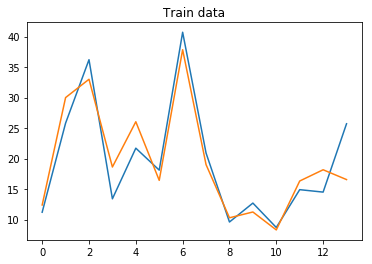

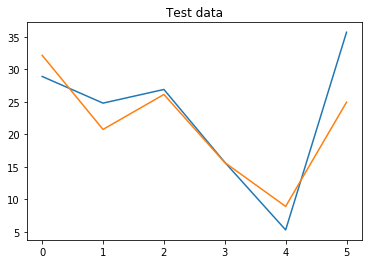

In [6]:
y_res = reg_func(x_train_n)
plt.title("Train data")
plt.plot(y_train)
plt.plot(y_res)
plt.show()

y_res = reg_func(x_test_n)
plt.title("Test data")
plt.plot(y_test)
plt.plot(y_res)
plt.show()

### Linear regression with custom gradient descent 

In [15]:
lin_reg = LinearCustom(x_train_n, y_train)
reg_func = lin_reg.regression(tol = 0.005, learn_rate = 35e-5,mom=0.1)

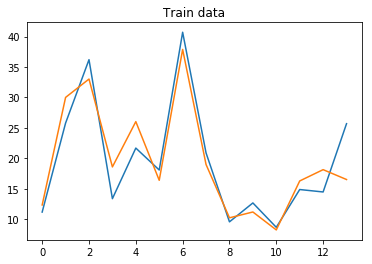

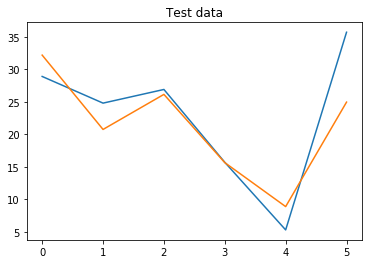

In [16]:
y_res = reg_func(x_train_n)
plt.title("Train data")
plt.plot(y_train)
plt.plot(y_res)
plt.show()

y_res = reg_func(x_test_n)
plt.title("Test data")
plt.plot(y_test)
plt.plot(y_res)
plt.show()

### Scikit learn Linear regression

In [17]:
from sklearn.linear_model import LinearRegression

In [21]:
sk_lin_reg = LinearRegression()
sk_lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

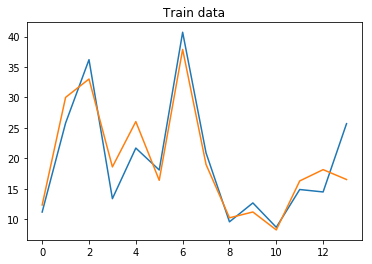

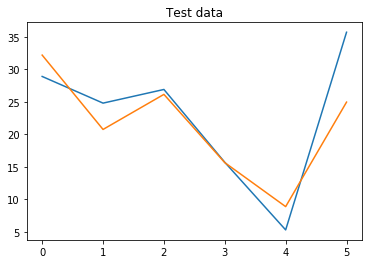

In [23]:
y_res = sk_lin_reg.predict(x_train)
plt.title("Train data")
plt.plot(y_train)
plt.plot(y_res)
plt.show()

y_res = sk_lin_reg.predict(x_test)
plt.title("Test data")
plt.plot(y_test)
plt.plot(y_res)
plt.show()